数据清洗

In [1]:
#以meal_order_detail.xlsx为例
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#一、读取数据
df=pd.read_excel('meal_order_detail.xlsx')

In [5]:
#二、初步了解数据
#查看数据(行,列)数
print('数据维度:',df.shape)
#查看各字段数据类型及缺失情况
print(df.info())
#查看字段中的缺失值数量
print('\n缺失值统计')
print(df.isnull().sum())


数据维度: (2779, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2779 entries, 0 to 2778
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   detail_id          2779 non-null   int64         
 1   order_id           2779 non-null   int64         
 2   dishes_id          2779 non-null   int64         
 3   logicprn_name      0 non-null      float64       
 4   parent_class_name  0 non-null      float64       
 5   dishes_name        2779 non-null   object        
 6   itemis_add         2779 non-null   int64         
 7   counts             2779 non-null   int64         
 8   amounts            2779 non-null   int64         
 9   cost               2767 non-null   float64       
 10  place_order_time   2779 non-null   datetime64[ns]
 11  discount_amt       0 non-null      float64       
 12  discount_reason    0 non-null      float64       
 13  kick_back          0 non-null      float64    

In [7]:
#三、缺失值处理
#删除缺失值过多且对结果影响不大的列(inplace=True代表直接修改原始的df)
df.drop(columns=['logicprn_name','parent_class_name','discount_amt','discount_reason','kick_back','add_info','bar_code'],inplace=True)
#对于缺失值少且重要的列,删除缺失字段所在的行(.notnull()判断每一个元素是否不是NaN,不是NaNFA则返回True。最后的df[]时布尔索引,只保留True的行)
df=df[df['cost'].notnull()]
#检查是否还剩下未删除的缺失值
print(df.isnull().sum())

detail_id           0
order_id            0
dishes_id           0
dishes_name         0
itemis_add          0
counts              0
amounts             0
cost                0
place_order_time    0
add_inprice         0
picture_file        0
emp_id              0
dtype: int64


In [9]:
#四、数据类型转换
#需要做数据类型转换的场景:时间分析,聚合计算(求和、平均、最值等),条件筛选(确保一致类型),模型训练等
df['place_order_time']=pd.to_datetime(df['place_order_time'],errors='coerce')#errors='coerce'代表如果无法转换成时间就会变成NaT

In [11]:
#五重复值与异常值处理
df.drop_duplicates(inplace=True)#删除完全相同的两行,inplace=True代表直接在原始df上修改
#筛选出满足条件的行(删除异常值所在的行).代码:df[条件]
df=df[df['amounts']>=0]#删除点餐份数为负的行
df=df[df['cost']>=0]#删除价格为负的行
print(df['amounts'].describe()) #检查某列大小值是否为负
print(df['cost'].describe())
df=df[df['cost']<=10000]#删除超出合理范围的值

count    2767.000000
mean       45.279003
std        36.760637
min         1.000000
25%        25.000000
50%        35.000000
75%        56.000000
max       178.000000
Name: amounts, dtype: float64
count    2767.000000
mean       46.305385
std        37.735076
min         1.000000
25%        25.000000
50%        35.000000
75%        56.000000
max       350.000000
Name: cost, dtype: float64


In [13]:
#六、新增时间字段(拆分年月日等)
df['year']=df['place_order_time'].dt.year #代表新增一列,只记录年份

In [15]:
#七、基础统计分析
df.describe()#返回所有数值型字段的count、mean、std、min、25%、50%、75%、max
df.info()#查看字段类型、非空数、数据类型
df['amounts'].value_counts()#对分类变量,离散变量进行频数统计
df.sort_values(by='amounts',ascending=False)#按字段排序

<class 'pandas.core.frame.DataFrame'>
Index: 2767 entries, 0 to 2778
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         2767 non-null   int64         
 1   order_id          2767 non-null   int64         
 2   dishes_id         2767 non-null   int64         
 3   dishes_name       2767 non-null   object        
 4   itemis_add        2767 non-null   int64         
 5   counts            2767 non-null   int64         
 6   amounts           2767 non-null   int64         
 7   cost              2767 non-null   float64       
 8   place_order_time  2767 non-null   datetime64[ns]
 9   add_inprice       2767 non-null   int64         
 10  picture_file      2767 non-null   object        
 11  emp_id            2767 non-null   int64         
 12  year              2767 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(8), object(2)
memory usage: 291.8

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,cost,place_order_time,add_inprice,picture_file,emp_id,year
853,2586,386,609993,百里香奶油烤红酒牛肉,0,1,178,178.0,2016-08-06 11:10:56,0,caipu/111.jpg,1160,2016
2158,8235,909,609993,百里香奶油烤红酒牛肉,0,1,178,178.0,2016-08-07 21:25:18,0,caipu/111.jpg,991,2016
206,3309,448,609993,百里香奶油烤红酒牛肉,0,1,178,178.0,2016-08-01 21:40:39,0,caipu/111.jpg,1449,2016
1866,2667,1027,609993,百里香奶油烤红酒牛肉,0,1,178,178.0,2016-08-07 18:35:11,0,caipu/111.jpg,1382,2016
2438,858,165,609707,百里香奶油烤紅酒牛肉,0,1,178,178.0,2016-08-09 12:47:36,0,caipu/201001.jpg,1097,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,1117,201,610010,白饭/小碗,0,2,1,2.0,2016-08-07 11:19:54,0,caipu/601004.jpg,1478,2016
523,1903,302,610010,白饭/小碗,0,8,1,8.0,2016-08-04 11:17:39,0,caipu/601004.jpg,1458,2016
1580,7805,871,610010,白饭/小碗,0,2,1,2.0,2016-08-07 11:15:56,0,caipu/601004.jpg,1562,2016
1446,3655,1108,610010,白饭/小碗,0,2,1,2.0,2016-08-06 21:33:35,0,caipu/601004.jpg,1140,2016


数据可视化

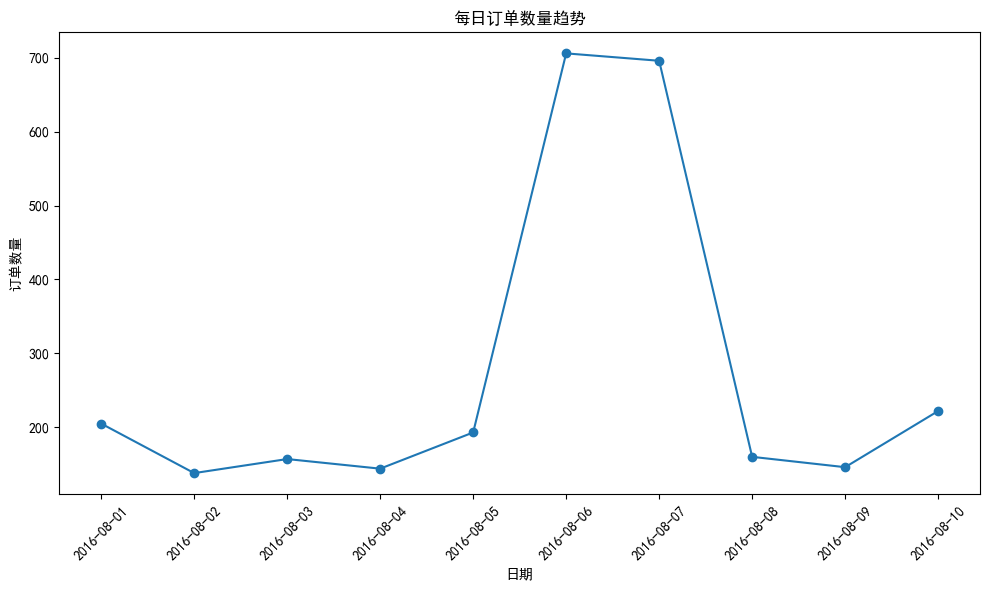

In [24]:
#Matplotlib可视化
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  #设置坐标轴中的负号‘-’正常显示
df['place_order_time'] = pd.to_datetime(df['place_order_time'])#确保时间格式是标准时间格式
df['date'] = df['place_order_time'].dt.date  #提取日期字段作为新列'date'
#折线图
#折线图常用于展示趋势变化
daily_orders = df.groupby('date')['detail_id'].count() #按照date分组统计每一天的订单量

plt.figure(figsize=(10, 6))#设置图像大小
daily_orders.plot(kind='line', marker='o')#line代表折线图,maker='o'代表在每个数据点加一个圆圈
plt.title("每日订单数量趋势")   
plt.xlabel("日期")
plt.ylabel("订单数量")
plt.xticks(rotation=45)#把 x 轴坐标（日期）旋转 45 度，避免挤在一起难以阅读。
plt.tight_layout()#自动调整边距，防止标题或坐标轴文字被截断。
plt.show()

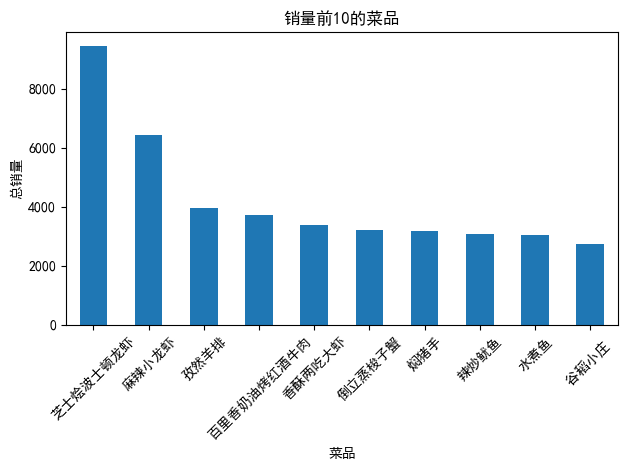

In [48]:
#柱状图
#柱状图适合对各类项目进行比较/排行榜/某指标在不同分组之间的差异。
top_dishes = df.groupby('dishes_name')['amounts'].sum().sort_values(ascending=False).head(10)
top_dishes.plot(kind='bar')
plt.title("销量前10的菜品")
plt.xlabel("菜品")
plt.ylabel("总销量")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


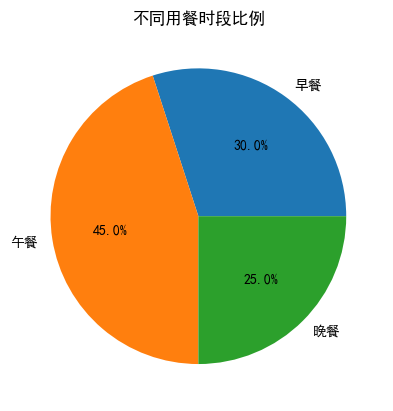

In [36]:
#饼图
#饼图显示组成结构占比,适用于分类比例
labels = ['早餐', '午餐', '晚餐']
sizes = [30, 45, 25]

plt.pie(sizes, labels=labels, autopct='%.1f%%')
plt.title("不同用餐时段比例")
plt.show()


In [3]:
#Pyecharts(交互式图标,适合Web展示和报告),用pip install pyecharts安装
from pyecharts.charts import Bar
from pyecharts.options import TitleOpts
from IPython.display import IFrame

# 数据
x_data = ['苹果', '香蕉', '橘子']
y_data = [30, 20, 50]
# 创建柱状图
bar = Bar()
bar.add_xaxis(x_data)
bar.add_yaxis("销量", y_data)
bar.set_global_opts(title_opts=TitleOpts(title="水果销量柱状图"))
# 保存为html网页
bar.render("bar_chart.html")  # 在当前目录生成 HTML 文件
#使用iframe在juypter中展示
IFrame(src="bar_chart.html", width='100%', height='500px')

In [58]:
#折线图
from pyecharts.charts import Line
from pyecharts.options import TitleOpts
from IPython.display import IFrame

# 数据
dates = ['2024-05-01', '2024-05-02', '2024-05-03', '2024-05-04']
orders = [120, 135, 100, 160]
# 创建折线图
line = Line()
line.add_xaxis(dates)
line.add_yaxis("订单数", orders)
line.set_global_opts(title_opts=TitleOpts(title="每日订单趋势"))
# 保存为 HTML 文件
line.render("line_chart.html")
# 用 iframe 展示
IFrame(src="line_chart.html", width='100%', height='500px')

In [60]:
#饼图
from pyecharts.charts import Pie
from pyecharts.options import TitleOpts, LabelOpts
from IPython.display import IFrame

# 数据
data = [("早餐", 30), ("午餐", 45), ("晚餐", 25)]
# 创建饼图
pie = Pie()
pie.add("", data)
pie.set_global_opts(title_opts=TitleOpts(title="不同用餐时段比例"))
pie.set_series_opts(label_opts=LabelOpts(formatter="{b}: {d}%"))
# 保存为 HTML 文件
pie.render("pie_chart.html")
# 用 iframe 展示
IFrame(src="pie_chart.html", width='100%', height='500px')